In [81]:
import pandas as pd


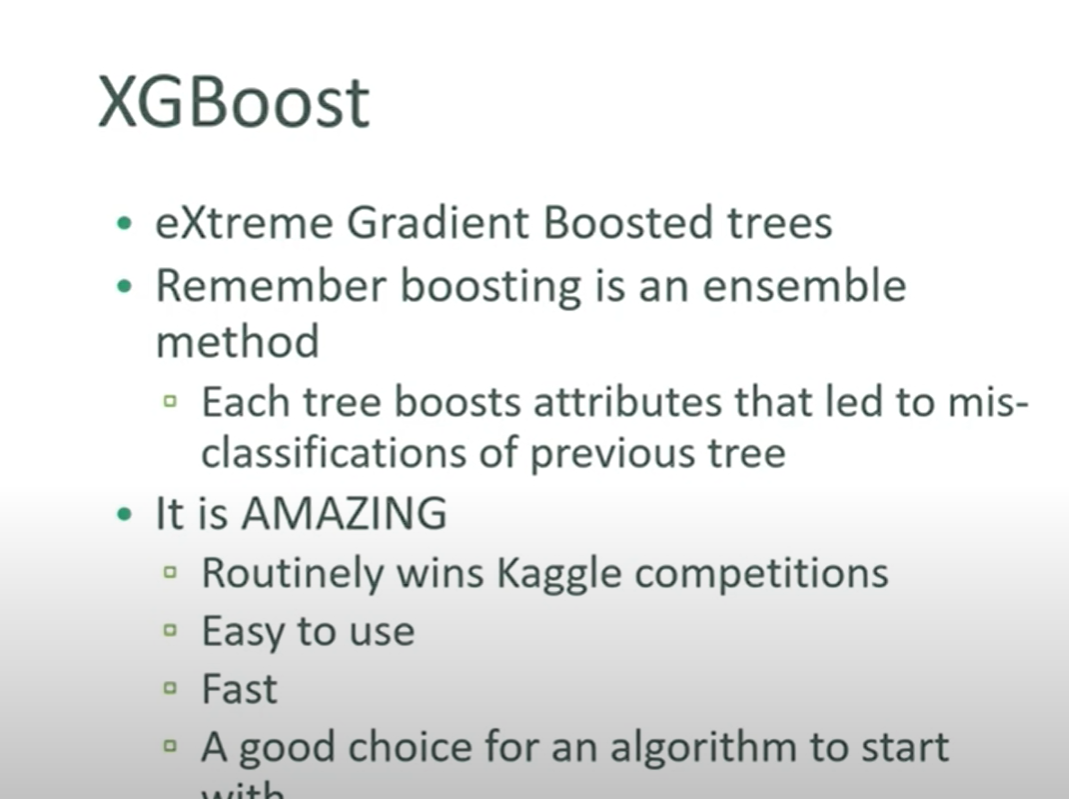

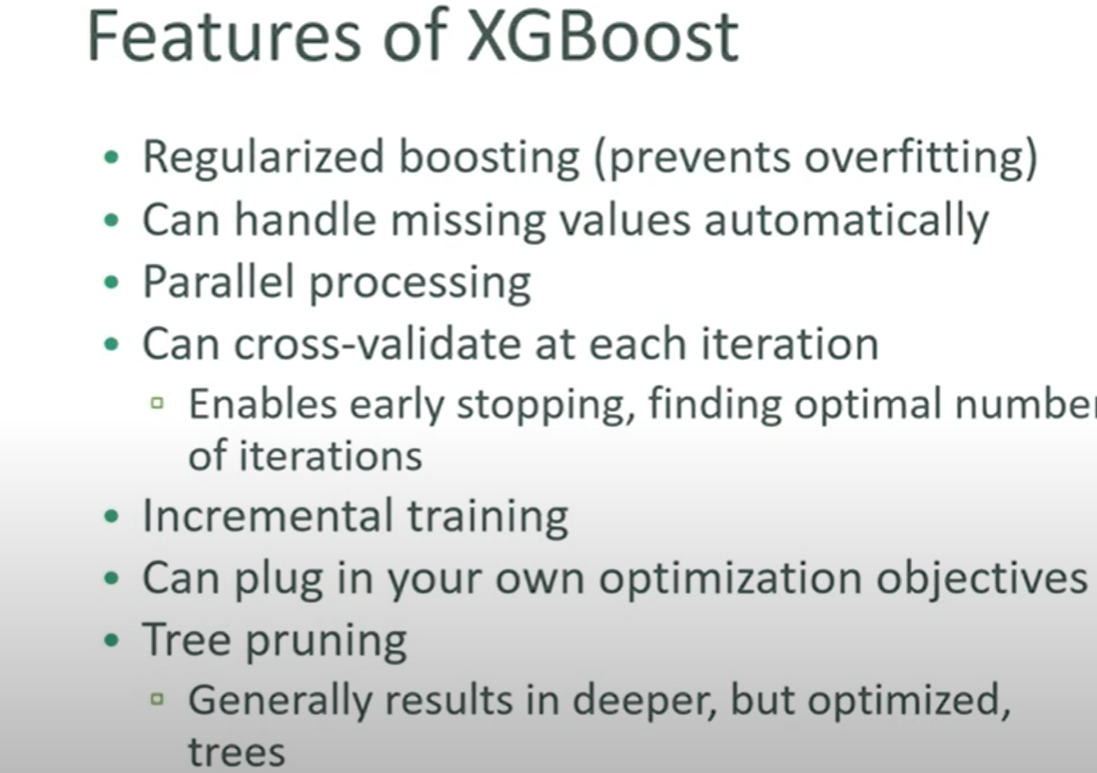


In [82]:
from xgboost import XGBClassifier


In [83]:
from sklearn.datasets import load_iris

In [84]:
df = pd.read_csv("iris.csv")

In [85]:
df = df[df["Species"].notnull()]

In [86]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X = df.drop("Species",axis = 1)
y = df["Species"]

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=20,random_state=42)

In [94]:
import xgboost as xgb
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [96]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


In [97]:
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)


***Using softmax Because of Multiclassification Problem***

In [91]:
param = {
    "max_depth":4,
    "eta":0.3,
    "objective":"multi:softmax",
    "num_class":3
}
epochs = 10         

In [92]:
model = XGBClassifier(**param, n_estimators=epochs)


In [98]:
model.fit(X_train_np, y_train_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_class=3, ...)

In [110]:
y_test_encoded = label_encoder.transform(y_test)


In [114]:
y_pred = model.predict(X_test_np)                               
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2])

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
accuracy_score(y_test_encoded,y_pred)

1.0